## Loading data into Jupyter

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [133]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [134]:
X=df.drop(['SalePrice'], axis=1)
y=df['SalePrice']

## Preprocessing

In [135]:
X.isna().any().sum()

19

Turns out that 19 of these 81 features need to be taken care of. Note that some of them are categorical, so these need to be OneHotEncoded after imputation.

In [136]:
X.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

We see that the categorical data is stored as dtype='Object', which we extract as ``categorical_mask``.

In [137]:
categorical_mask = (X.dtypes == object)
cat_columns=X.columns[categorical_mask].tolist()
df[cat_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [138]:
df[cat_columns].isna().any().sum()

16

That is, 16 of the 19 features with NaN are infact categorical, which we need to impute - we choose ``most_frequent``.

In [139]:
from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X[cat_columns]=imp_freq.fit_transform(X[cat_columns])

For the remaining 3 numeric categories that have NaN, we impute to their ``mean``.

In [140]:
num_columns=X.columns[~categorical_mask].tolist() #find the numerical 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X[num_columns]=imp_mean.fit_transform(X[num_columns])

We quickly check that all NaNs have been indeed imputed.

In [141]:
X.isna().any().sum()

0

Finally, the categorical features need to be ``OneHotEncoded``. To avoid multicollinearity, we use ``get_dummies`` instead.

In [142]:
X_new=pd.get_dummies(X,drop_first=True) # automatically picks the 'Object' columns to OneHotEncoded

In [143]:
print("old:",X.shape,", new:", X_new.shape)

old: (1460, 80) , new: (1460, 246)


Let's also perform feature scaling on ``X``, since there is large variation in the feature value range

In [151]:
from sklearn.preprocessing import StandardScaler
scaled_X = pd.DataFrame(StandardScaler().fit_transform(X_new), index=X_new.index, columns=X_new.columns)

## XGBoost with Grid Search Cross-Validation

Simple ``XGBoost`` without any fancy tunings or CV

In [150]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

We also include a warnings filter as XGBoost has annoying ``FutureWarnings``

In [146]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [18]:
xgr0=xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10)

In [39]:
xgr0.fit(scaled_X,y)
ypred=xgr0.predict(scaled_X)
MSE(y,ypred)**0.5

77106.8605705037

``XGBoost`` with ``GridSearchCV``

In [147]:
from sklearn.model_selection import GridSearchCV
data=xgb.DMatrix(data=scaled_X,label=y)

In [148]:
gbm_param_grid={'n_estimators':[100,300,400,500],'subsample':[0.7,0.9,0.95],'colsample_bytree':[.25,.5,.75,.95]}
gbm=xgb.XGBRegressor(objective='reg:squarederror')

## Test set predictions

In [128]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [129]:
test=pd.read_csv('test.csv')

In [161]:
#Imputation
categorical_mask = (test.dtypes == object)
cat_columns=test.columns[categorical_mask].tolist()

imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test[cat_columns]=imp_freq.fit_transform(test[cat_columns])

num_columns=test.columns[~categorical_mask].tolist() #find the numerical 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
test[num_columns]=imp_mean.fit_transform(test[num_columns])

#One Hot Encooding
test_new=pd.get_dummies(test,drop_first=True)

#Feature Scaling
scaled_test = pd.DataFrame(StandardScaler().fit_transform(test_new), index=test_new.index, columns=test_new.columns)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.25, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

Check ordering and number of columns in test and training set

In [190]:
print("Training shape:",scaled_X.shape,"Test shape:",scaled_test.shape,
      "Shared columns:",scaled_test[np.intersect1d(scaled_test.columns, scaled_X.columns)].shape[1])

Training shape: (1460, 246) Test shape: (1459, 228) Shared columns: 228


In [218]:
#Truncate train set to only care about common features
trunc_X=scaled_X[np.intersect1d(scaled_X.columns, scaled_test.columns)] 

#Truncate train set to only care about common features
trunc_test = scaled_test[trunc_X.columns]

#Verify this truncation has happened
print("Training shape:",trunc_X.shape,"Test shape:",trunc_test.shape,
      "Shared columns:",trunc_test[np.intersect1d(trunc_test.columns, trunc_X.columns)].shape[1])

Training shape: (1460, 228) Test shape: (1459, 228) Shared columns: 228


Perform ``GridSearchCV`` with the parameter grid chosen above

In [268]:
grid_mse=GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4)
grid_mse.fit(trunc_X,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.25, 0.5, 0.75, 0.95],
                         'n_estimators': [100, 300, 400,

In [269]:
print('Best parameters=',grid_mse.best_params_)
print('Lowest RMSE=',(-grid_mse.best_score_)**0.5)

Best parameters= {'colsample_bytree': 0.75, 'n_estimators': 300, 'subsample': 0.9}
Lowest RMSE= 25313.93558847085


In [270]:
# XGBoost Regression with best_params_
xgreg=xgb.XGBRegressor(objective='reg:squarederror', **grid_mse.best_params_)
xgreg.fit(trunc_X,y) #from training data
predictions=xgreg.predict(trunc_test) #from training data
print(predictions)

[127731.23  165412.17  182301.1   ... 162625.5   125295.945 238841.67 ]


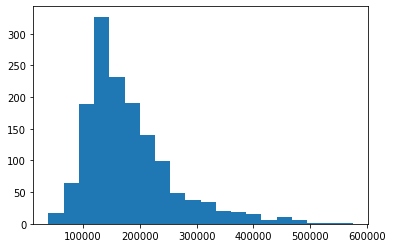

In [271]:
plt.hist(predictions,bins=20)
plt.savefig('AmesPredictions.png')
plt.show()

In [272]:
pd.DataFrame({'Id': test['Id'].astype(int),'SalePrice': predictions}).set_index('Id').to_csv('prediction.csv')

## Other predictors

In [293]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

``GridSearch`` over all Decision Trees

In [292]:
dt=DecisionTreeRegressor(max_depth=3,random_state=42,min_samples_leaf=0.1)
dt_param_grid={'max_depth':[3,5,7,10,12,15],'min_samples_leaf':[10,15,20,25,30]}
grid_mse=GridSearchCV(estimator=dt,param_grid=dt_param_grid,scoring='neg_mean_squared_error',cv=4)
grid_mse.fit(trunc_X,y)
print('Best parameters=',grid_mse.best_params_)
print('Lowest RMSE=',(-grid_mse.best_score_)**0.5)

Best parameters= {'max_depth': 10, 'min_samples_leaf': 20}
Lowest RMSE= 38056.08589132744


Use these ``best_params_`` into the ``AdaBoostRegressor``

In [291]:
dt=DecisionTreeRegressor(random_state=42,**grid_mse.best_params_) #Decision Tree from above
adb=AdaBoostRegressor(base_estimator=dt)
adb_param_grid={'n_estimators':[10,20,50,100,200,400]}
grid_mse=GridSearchCV(estimator=adb,param_grid=adb_param_grid,scoring='neg_mean_squared_error',cv=4)
grid_mse.fit(trunc_X,y)
print('Best parameters=',grid_mse.best_params_)
print('Lowest RMSE=',(-grid_mse.best_score_)**0.5)

Best parameters= {'n_estimators': 100}
Lowest RMSE= 28764.42129776416


Meh.. XGBoost is definitely better than this. Let's try ``GradientBoostingRegressor``.

In [298]:
gb=GradientBoostingRegressor()
gb_param_grid={'n_estimators':[200,400,600,800],'max_depth':[3,5,7,10,12]}
grid_mse=GridSearchCV(estimator=gb,param_grid=gb_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1)
grid_mse.fit(trunc_X,y)
print('Best parameters=',grid_mse.best_params_)
print('Lowest RMSE=',(-grid_mse.best_score_)**0.5)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 10.6min finished


Best parameters= {'max_depth': 3, 'n_estimators': 200}
Lowest RMSE= 26093.699328043156


In [299]:
gb=xgb.XGBRegressor(objective='reg:squarederror', **grid_mse.best_params_)
gb.fit(trunc_X,y)
predictions=(xgreg.predict(trunc_test)+gb.predict(trunc_test))/2

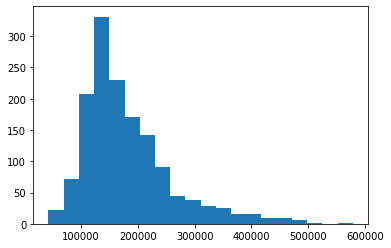

In [301]:
plt.hist(predictions,bins=20)
#plt.savefig('AmesPredictions.png')
plt.show()